# Exploring the Stroke Predicition Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 entries of data, with 12 columns in total.
Let's check if there are Nan values in any of the columns

In [6]:
for col in df.columns:
    print(f'{col} : {df[col].isnull().sum()}')

id : 0
gender : 0
age : 0
hypertension : 0
heart_disease : 0
ever_married : 0
work_type : 0
Residence_type : 0
avg_glucose_level : 0
bmi : 201
smoking_status : 0
stroke : 0


Lets also check the unique values of all the object columns.

In [7]:
for col in df.columns:
    # print(f'{col} : {df[col].dtype}')
    if df[col].dtype == 'object':
        print(f'{col} : {df[col].unique()}')

gender : ['Male' 'Female' 'Other']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


The categorical columns only have a few unique values, making the data cleaning simpler.

In [8]:
df_copy = df.iloc[:,[1,2,3,4,8,9,10,11]]
df_copy.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


In [9]:
df_copy['bmi'].isnull().sum()

np.int64(201)

The BMI column has 201 NaN values and we would need to handle these values.

### Visualization

Let's now see some plots to visualize the data and study the trends and also identify outliers and such.

C:\Users\overw\AppData\Local\Temp\ipykernel_5296\362504996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patientsdf['age_group'] = pd.cut(df['age'],labels=group,bins=bins,right=False)
C:\Users\overw\AppData\Local\Temp\ipykernel_5296\362504996.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group',y='count',data=stroke_patientsdf,palette='hls')


<Axes: xlabel='age_group', ylabel='count'>

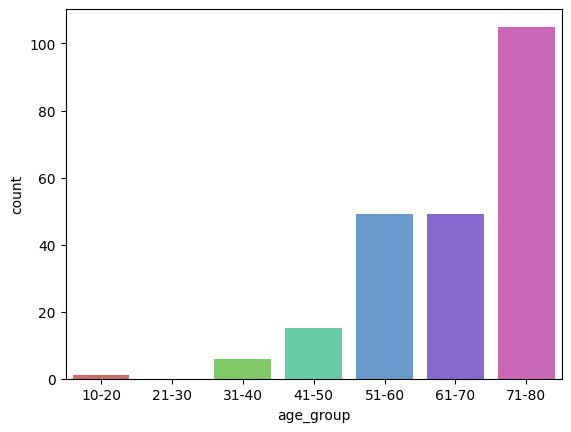

In [10]:
stroke_patientsdf = df_copy[df_copy['stroke'] == 1]
group = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80']
bins = [10,21,31,41,51,61,71,81]
stroke_patientsdf['age_group'] = pd.cut(df['age'],labels=group,bins=bins,right=False)
# stroke_patientsdf
stroke_patientsdf = pd.DataFrame(stroke_patientsdf['age_group'].value_counts())
sns.barplot(x='age_group',y='count',data=stroke_patientsdf,palette='hls')

We can see that most of the patients who suffered a stroke are above 50 years of age.

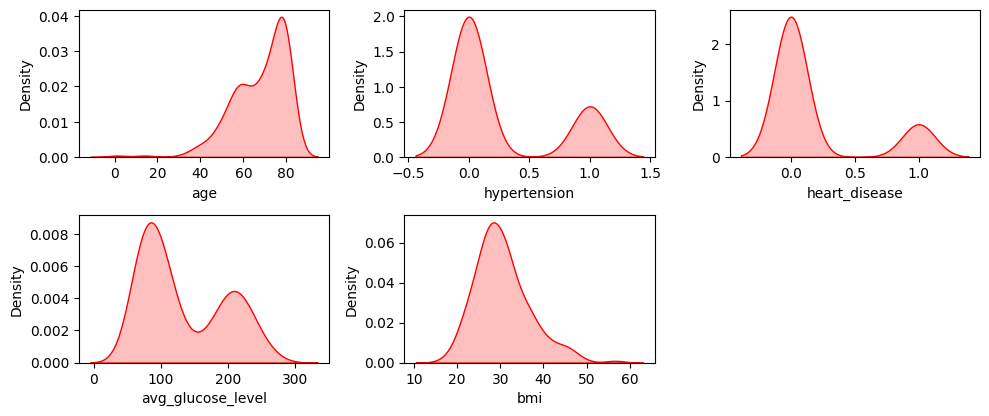

In [11]:
numerical_columns = [col for col in df_copy.columns if df_copy[col].dtype != 'O']
## removing stroke column to avoid errors when plotting cases where stroke occured
numerical_columns.pop()

df_mod =df_copy[df_copy['stroke']==1]
plt.figure(figsize=(10,10))
for i in range(0,len(numerical_columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_mod[numerical_columns[i]],fill=True,color='r')
    plt.xlabel(f'{numerical_columns[i]}')
    plt.tight_layout()

<Axes: xlabel='stroke', ylabel='bmi'>

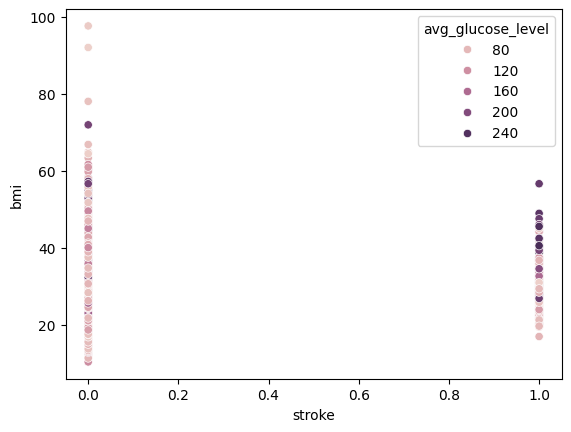

In [12]:
sns.scatterplot(x='stroke',y='bmi',hue='avg_glucose_level',data=df_copy)

Lets check if the dataset is imbalanced

In [13]:
df_copy['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

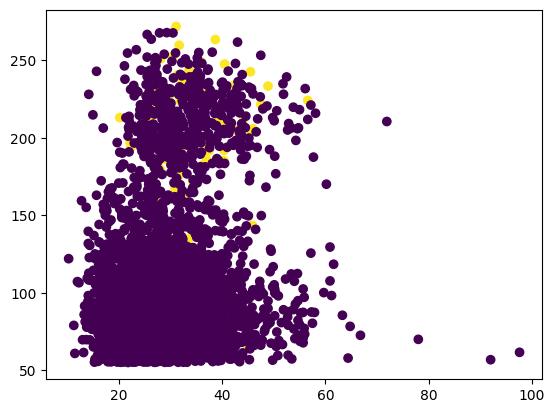

In [14]:
plt.scatter(df_copy['bmi'],df_copy['avg_glucose_level'],c=df_copy['stroke'])

This dataset is **imbalanced** as the number of datapoints where the patients had a stroke are much less than that of patients that didn't have a stroke. So we will have to handle that using Oversampling techniques.

In [ ]:
df_minority = df_copy[df_copy['stroke'] == 1]
df_majority = df_copy[df_copy['stroke'] == 0]
np.sum([df_copy['stroke'] == 0])/np.sum([df_copy['stroke'] == 1]) ## scale_pos_weight for XGB

np.float64(19.522088353413654)

In [16]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enco = OneHotEncoder()
lblenco = LabelEncoder()
temp= enco.fit_transform(df_copy[['gender']]).toarray()
temp2 = lblenco.fit_transform(df_copy[['smoking_status']])
temp_df = pd.DataFrame(temp,columns=enco.get_feature_names_out())
temp2_df = pd.DataFrame(temp2,columns=['smoking_status'])
final_df = pd.concat([df_copy.drop(['gender','smoking_status'],axis=1),temp_df,temp2_df],axis=1)
final_df.head()
final_df.dropna(inplace=True)


d:\Random\Machine Learning Stuff\Projects\stroke-prediction\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'avg_glucose_level')

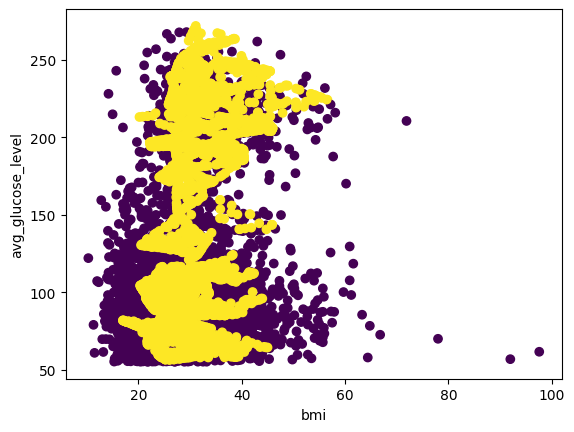

In [17]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X,y = oversampler.fit_resample(final_df.iloc[:,:-1],final_df['stroke'])
plt.scatter(X['bmi'],X['avg_glucose_level'],c=y)
plt.xlabel('bmi')
plt.ylabel('avg_glucose_level')